In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/diabetes2.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Age', ylabel='Count'>

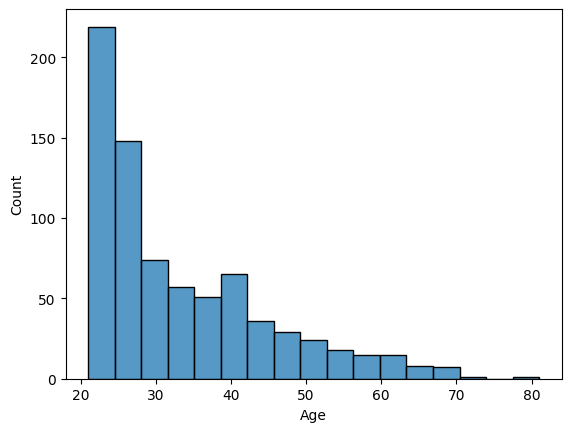

In [ ]:
sns.histplot(x=df['Age'])

<Axes: xlabel='Glucose', ylabel='Count'>

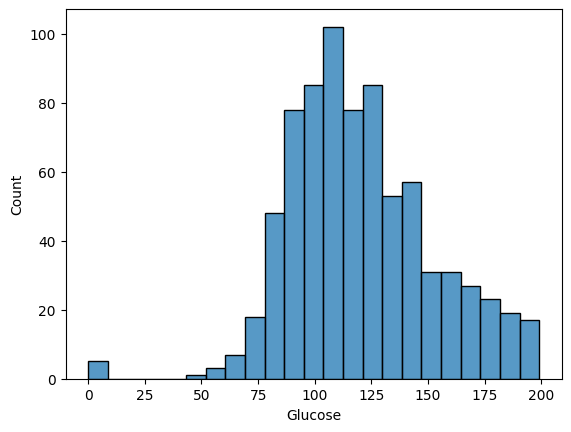

In [ ]:
sns.histplot(x=df['Glucose'])

<Axes: xlabel='BloodPressure', ylabel='Count'>

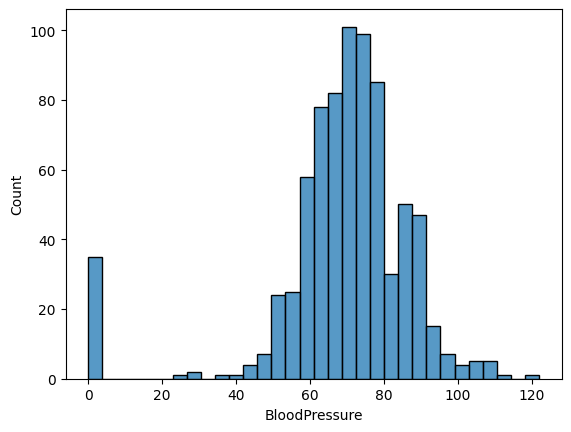

In [ ]:
sns.histplot(x=df['BloodPressure'])

<Axes: xlabel='SkinThickness', ylabel='Count'>

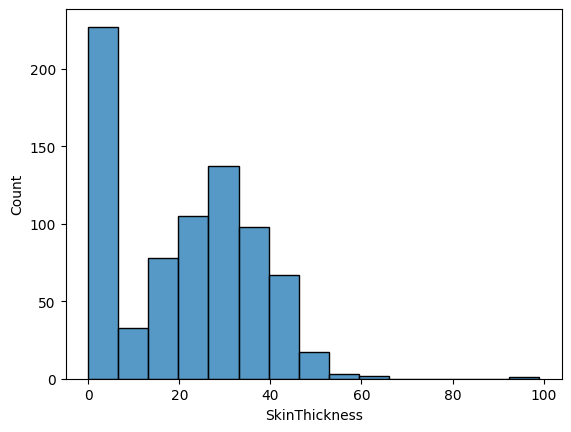

In [ ]:
sns.histplot(x=df['SkinThickness'])

<Axes: xlabel='BMI', ylabel='Count'>

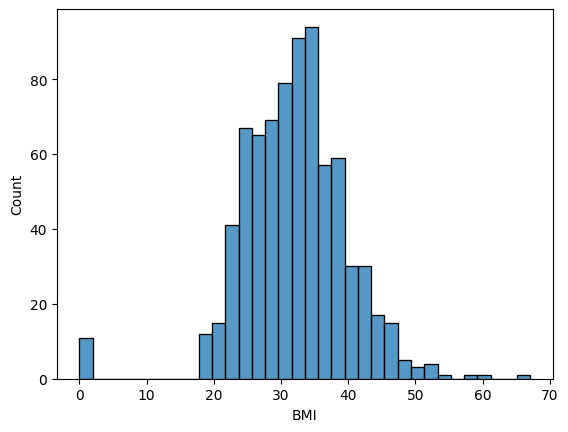

In [ ]:
sns.histplot(x=df['BMI'])

<Axes: xlabel='BMI', ylabel='Outcome'>

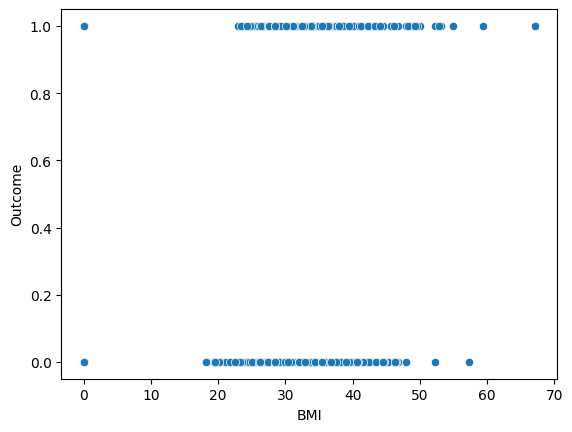

In [ ]:
sns.scatterplot(x=df['BMI'],y=df['Outcome'])

<Axes: xlabel='Glucose', ylabel='Outcome'>

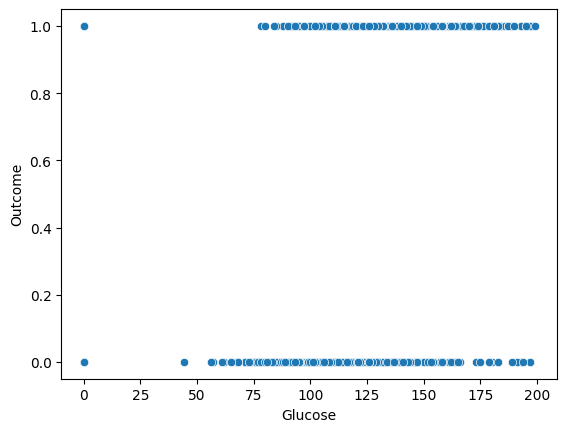

In [ ]:
sns.scatterplot(x=df['Glucose'],y=df['Outcome'])

In [ ]:
y=df['Outcome']
x=df.drop(df[['Outcome']],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_X=SS.fit_transform(x)
SS_X=pd.DataFrame(SS_X,columns=x.columns)
SS_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(SS_X,y)

LogisticRegression()

In [ ]:
y_pred=LR.predict(SS_X)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y,y_pred)
print(cm)
ac=accuracy_score(y,y_pred)
print("Accuracy Score",np.round(ac,2))

[[446  54]
 [112 156]]
Accuracy Score 0.78


In [ ]:
from sklearn.metrics import recall_score,precision_score,f1_score
sensitivity=recall_score(y,y_pred)
print("Sensitivity",np.round(sensitivity,2))
precision=precision_score(y,y_pred)
print("Precision",np.round(precision,2))
f1score=f1_score(y,y_pred)
print("f1score",np.round(f1score,2))

Sensitivity 0.57
Precision 0.74
f1score 0.65


In [ ]:
TN=cm[0,0]
FP=cm[0,1]
TNR=TN/(TN+FP)
print("Specificity",np.round(TNR,2))

Specificity 0.89


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(SS_X,y,test_size=0.3,random_state=100)
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train)
Y_pred_train=LR.predict(X_train)
Y_pred_test=LR.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_train,Y_pred_train)
trainingscore=accuracy_score(Y_train,Y_pred_train)
print(" Train Accuracy Score",np.round(trainingscore,2))
testscore=accuracy_score(Y_test,Y_pred_test)
print(" Test Accuracy Score",np.round(testscore,2))


 Train Accuracy Score 0.8
 Test Accuracy Score 0.75


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
train_acc=[]
test_acc=[]
for i in range(1,501):
  X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y,test_size=0.3,random_state=i)
  LR=LogisticRegression()
  LR.fit(X_train,Y_train)
  Y_pred_train=LR.predict(X_train)
  Y_pred_test=LR.predict(X_test)
  train_acc.append(accuracy_score(Y_train, Y_pred_train))
  test_acc.append(accuracy_score(Y_test , Y_pred_test))
print("Cross validation Train accuracy",np.round(np.mean(train_acc),2))
print("Cross validation Test accuracy",np.round(np.mean(test_acc),2))

NameError: name 'SS_X' is not defined

In [ ]:
train_acc=[]
test_acc=[]
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=False)
for train_index,test_index in kf.split(SS_X):
  X_train,X_test=SS_X.iloc[train_index],SS_X.iloc[test_index]
  Y_train,Y_test=Y[train_index],Y[test_index]
  for i in range(1,501):
    X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y,test_size=0.3,random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train,Y_train)
    Y_pred_train=LR.predict(X_train)
    Y_pred_test=LR.predict(X_test)
    train_acc.append(accuracy_score(Y_train, Y_pred_train))
    test_acc.append(accuracy_score(Y_test , Y_pred_test))
print("Cross validation Train accuracy",np.round(np.mean(train_acc),2))
print("Cross validation Test accuracy",np.round(np.mean(test_acc),2))